# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [21]:
medical.shape

(1338, 8)

In [22]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

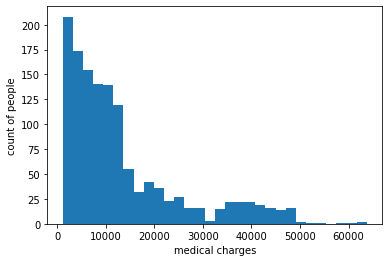

In [23]:
_ = plt.hist(medical['charges'],bins=30)
_ = plt.xlabel('medical charges')
_ = plt.ylabel('count of people')

In [24]:
data_mean = np.mean(medical['charges'])
data_std = np.std(medical['charges'])
data_len = len(medical['charges'])
print(data_mean,data_std,data_len)

13270.422265141257 12105.484975561605 1338


The mean is 13,270 and the standard deviation is 12,105. The standard deviation is quite just as high as the mean. The histogram shows that the data is highly skewed, and so the standard deviation may not be the best measure to get an idea of the  spread of the data.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ In this case we can use a z-test or a t-test because the sample size is large (1338 data points) and we can invoke the central limit theorem, which states that, regardless of the initial distribution of the random variable, the sampling distribution of the mean will approach a normal distribution with a large enough sample size. In order to answer the adminitrator's question and infer the average charge from this dataset, we can compute a confidence interval of what we would expect the average charge to be. To do this, we need estimates for the actual average charge and the standard deviation of the sampling distribution of the average charge. To determine the standard deviation of the sampling distribution, we need the standard deviation of all medical charges. However, we do not know the real standard deviation, and we'd have to estimate it using the standard deviation of the sample. We can only do this with a t-test because the z-test assumes we know the real standard deviation. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ This should be a one-sided interval because we are trying to determine if the average charge is less than 12,000. So we will determine the probability than the average charge is less than 12,000 using sampling distribution of the average charge.

In [25]:
lower=t.ppf(0.025,data_len-1,loc=data_mean,scale=data_std/(np.sqrt(data_len)))
upper=t.ppf(0.975,data_len-1,loc=data_mean,scale=data_std/(np.sqrt(data_len)))
margin_of_error=(upper-lower)/2
confidence_interval=[data_mean-margin_of_error,data_mean+margin_of_error]
confidence_interval

[12621.196780689985, 13919.647749592528]

There is a 95% confidence that the mean lies between 12,621 and 13,919. 12,000 is not within this range, therefore, the administrator should not be concerned that the actual average charge has fallen to below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

__Null hypothesis__: There is no difference between the average charge of those with insurance and of those without insurance. The difference between the values is 0.

__Alternative hypothesis__: There is a difference between the average charge of those with insurance and those without insurance. The difference between the values is not equal to 0.

With the assumption that the null hypothesis is correct, what is the probability of getting a difference of 7603 in average charge between the two groups? If that probability is below the significance level, we will reject the null hypothesis.

__This t-test assumes__ that the two groups have equal variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [63]:
#define variables
n0=len(no_insurance)
n1=len(with_insurance)
s0=np.std(no_insurance)
s1=np.std(with_insurance)
x0=np.mean(no_insurance)
x1=np.mean(with_insurance)

#calculate the pooled standard deviation
sp=np.sqrt(((n0-1)*(s0**2)+(n1-1)*(s1**2))/(n0+n1-2))

#calculate the t-statistic
t_statistic=((x0-x1)/(sp*np.sqrt((1/n0)+(1/n1))))

print('t-statistic = ' + "{:.2f}".format(t_statistic))
print('p-value = ' + "{:.2f}".format(2*(1-t.cdf(abs(t_statistic),df=554))))

t-statistic = -11.90
p-value = 0.00


In [64]:
from scipy.stats import ttest_ind
res = ttest_ind(no_insurance,with_insurance)
res

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

There is a very small chance of observing the average difference in charge from this sample groups under the null hypothesis, which leads us to reject the null hypothesis.  

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I could not find an equivalent function for performing a z-test from a sample. All I could find was the normaltest function, which tests whether a sample differs from a normal distribution. I believe this is because in reality, we don't use the z-statistic for these kinds of problems because it assumes that we know the standard deviation from the population, which in reality we never do.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test